In [223]:
from scipy.io import loadmat
import pandas as pd
from PIL import Image
import os
import shutil
import matplotlib.pyplot 

In [112]:
image_path = 'jpg/'

### Loading the image labels and the data split classes.

In [106]:
ids = loadmat('setid.mat')
labelData = loadmat('imagelabels.mat')
images = os.listdir(image_path)
len(images)

8189

#### Creating a pandas dataframe to store the flowers 102 data and plotting.

As can be seen from the class distribution, the classes are imbalanced.

<Axes: xlabel='Classes', ylabel='Frequency'>

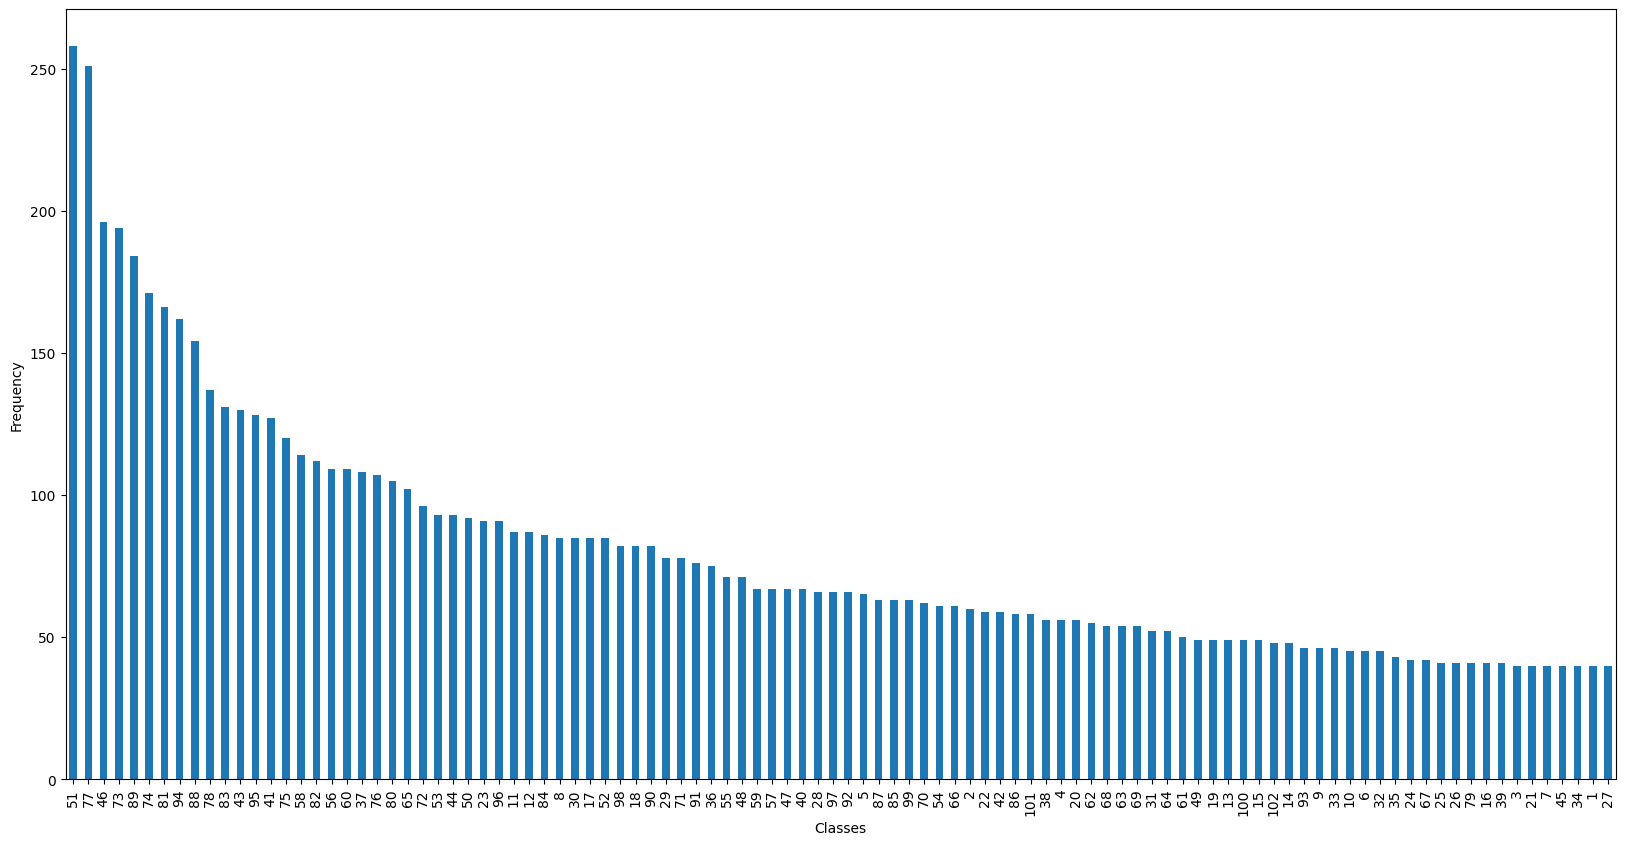

In [152]:
df = pd.DataFrame({'Flower_ID': list(range(1, 8190)), 'Label_ID' : labelData['labels'][0], 'Image_Path' : images })
df['Label_ID'].value_counts().plot(kind = 'bar', figsize = (20, 10), xlabel = "Classes", ylabel = "Frequency")


In [153]:
df

,Flower_ID,Label_ID,Image_Path
0,1,77,image_00001.jpg
1,2,77,image_00002.jpg
2,3,77,image_00003.jpg
3,4,77,image_00004.jpg
4,5,77,image_00005.jpg
...,...,...,...
8184,8185,62,image_08185.jpg
8185,8186,62,image_08186.jpg
8186,8187,62,image_08187.jpg
8187,8188,62,image_08188.jpg


In [159]:
img = Image.open(image_path+'image_00001.jpg')
img.size

(591, 500)

In [161]:
h, w = [], []
for i in images:
    img = Image.open(image_path+i)
    h.append(img.height)
    w.append(img.width)

In [163]:
df['Height'] = h
df['Width'] = w
df

,Flower_ID,Label_ID,Image_Path,Height,Width
0,1,77,image_00001.jpg,500,591
1,2,77,image_00002.jpg,500,625
2,3,77,image_00003.jpg,667,500
3,4,77,image_00004.jpg,500,667
4,5,77,image_00005.jpg,500,508
...,...,...,...,...,...
8184,8185,62,image_08185.jpg,500,713
8185,8186,62,image_08186.jpg,500,609
8186,8187,62,image_08187.jpg,500,554
8187,8188,62,image_08188.jpg,500,702


Next, histograms of the widths and heights of the images in the dataset were plotted. It is apparent that all images do not have uniform dimensions and hence, they need to be resized. 

Text(0.5, 1.0, 'Width Frequency Hist')

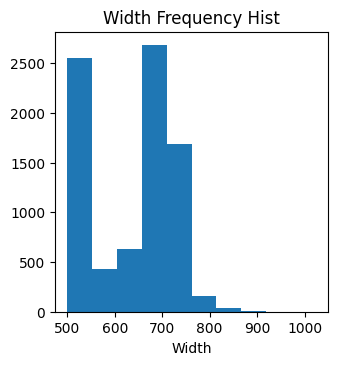

In [231]:

plt.figure(figsize = (12, 8))
plt.subplot(2, 3, 1)
plt.hist(df['Width'])
plt.xlabel('Width')
plt.title('Width Frequency Hist')

Text(0.5, 1.0, 'Width Frequency Hist')

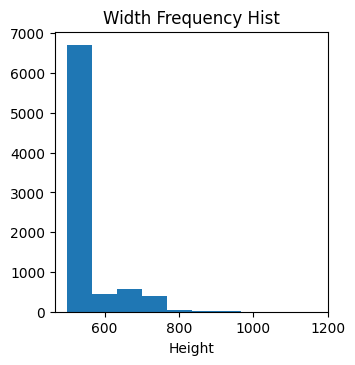

In [230]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 3, 1)
plt.hist(df['Height'])
plt.xlabel('Height')
plt.title("Width Frequency Hist")

#### Loading the data split labels and creating class folders for each split.

In [102]:
train_labels = ids['trnid'][0]
test_labels = ids['tstid'][0]
valid_labels = ids['valid'][0]

if not os.path.exists(image_path+'train'):
    os.mkdir(image_path+'train')
if not os.path.exists(image_path+'test'):    
    os.mkdir(image_path+'test')
if not os.path.exists(image_path+'valid'):
    os.mkdir(image_path+'valid')

for i in range(1, 103):
    if not os.path.exists(image_path+'train/'+str(i)):
        os.mkdir(image_path+'train/'+str(i))

for i in range(1, 103):
    if not os.path.exists(image_path+'test/'+str(i)):
        os.mkdir(image_path+'test/'+str(i))
    
for i in range(1, 103):
    if not os.path.exists(image_path+'valid/'+str(i)):
        os.mkdir(image_path+'valid/'+str(i))

According to each label in the dataframe, the corresponding images are moved to their respective class folders inside the split they belong to.

In [99]:
def label_seperator(label_type):
    print(label_type)
    x = []
    for images in os.listdir(image_path):
        num = images[6:11]
        if num == '':
            break
        for i in label_type:
            if i == int(num):
                x.append(images)
        
    return x
    

def move_images(label, folder):
    for image in label:
        shutil.move(image_path+image, image_path+folder+'/'+str(df[(df['Image_Path'] == image)].Label_ID.values[0]))

In [80]:
trainLabels = label_seperator(train_labels)
testLabels = label_seperator(test_labels)
validLabels = label_seperator(valid_labels)

[6765 6755 6768 ... 8026 8036 8041]
[6734 6735 6737 ... 8044 8045 8047]
[6773 6767 6739 ... 8028 8008 8030]


In [83]:
print(trainLabels)
print(train_labels)

['image_00028.jpg', 'image_00036.jpg', 'image_00079.jpg', 'image_00116.jpg', 'image_00118.jpg', 'image_00126.jpg', 'image_00144.jpg', 'image_00177.jpg', 'image_00200.jpg', 'image_00216.jpg', 'image_00274.jpg', 'image_00297.jpg', 'image_00319.jpg', 'image_00375.jpg', 'image_00380.jpg', 'image_00383.jpg', 'image_00401.jpg', 'image_00411.jpg', 'image_00442.jpg', 'image_00444.jpg', 'image_00485.jpg', 'image_00487.jpg', 'image_00501.jpg', 'image_00514.jpg', 'image_00534.jpg', 'image_00535.jpg', 'image_00564.jpg', 'image_00576.jpg', 'image_00587.jpg', 'image_00590.jpg', 'image_00656.jpg', 'image_00664.jpg', 'image_00666.jpg', 'image_00667.jpg', 'image_00668.jpg', 'image_00672.jpg', 'image_00695.jpg', 'image_00717.jpg', 'image_00737.jpg', 'image_00773.jpg', 'image_00803.jpg', 'image_00848.jpg', 'image_00864.jpg', 'image_00876.jpg', 'image_00888.jpg', 'image_00893.jpg', 'image_00912.jpg', 'image_00921.jpg', 'image_00922.jpg', 'image_00945.jpg', 'image_00964.jpg', 'image_00986.jpg', 'image_0101

In [103]:
move_images(trainLabels, 'train')
move_images(testLabels, 'test')
move_images(validLabels, 'valid')